### Import Library

In [34]:
import tensorflow.keras.utils as image
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import DepthwiseConv2D

### Import Model

In [35]:
trainPath = r'dataset\dataSplit\train'
class_names = os.listdir(trainPath)

print('All category : ',class_names)

All category :  ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']


In [36]:
# Custom Dropout layer
def fixed_dropout(rate, **kwargs):
    return tf.keras.layers.Dropout(rate=rate, **kwargs)

# Custom DepthwiseConv2D to ignore 'groups' argument
class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, **kwargs):
        kwargs.pop('groups', None)
        super().__init__(**kwargs)

custom_objects = {
    'FixedDropout': fixed_dropout,
    'DepthwiseConv2D': CustomDepthwiseConv2D
}

# Load the model with custom objects
try:
    modeleff = load_model("saved-models/model_EfficientNetB7.h5", custom_objects=custom_objects)
    print("Model loaded successfully!")
except Exception as e:
    print("Error loading model:", e)
    


Error loading model: Error when deserializing class 'Activation' using config={'name': 'stem_activation', 'trainable': False, 'dtype': 'float32', 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'swish', 'registered_name': 'function'}}.

Exception encountered: Could not locate function 'swish'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'swish', 'registered_name': 'swish'}


### Prediciton

Agaricus 	: 84 %
Amanita 	: 1 %
Boletus 	: 0 %
Cortinarius 	: 0 %
Entoloma 	: 1 %
Hygrocybe 	: 0 %
Lactarius 	: 1 %
Russula 	: 13 %
Suillus 	: 0 %


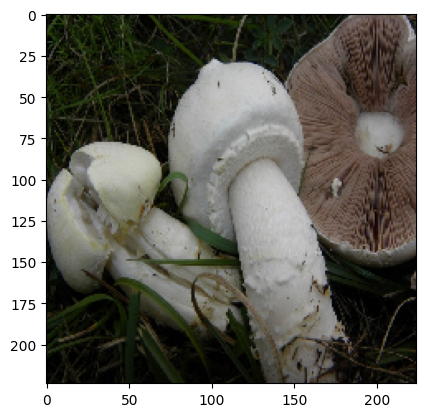

In [39]:
img_path = "prediction-image/testingImage.jpg"

img = image.load_img(img_path, target_size=(224,224))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = modeleff.predict(images, batch_size=10,verbose=0)

for i in range(len(class_names)):
     print(class_names[i],'\t:', round((classes[0][i])*100), "%")

# predictionresnet = class_names[np.argmax(classes)]
# confidenceresnet = classes.max()

# print(predictionresnet+":", confidenceresnet)